# Mini Project 5-3 Explore Sampling

## Introduction
In this project, you will engage in effective sampling of a dataset in order to make it easier to analyze. As a data professional you will often work with extremely large datasets, and utilizing proper sampling techniques helps you improve your efficiency in this work. 

For this project, you are a member of an analytics team for the Environmental Protection Agency. You are assigned to analyze data on air quality with respect to carbon monoxide—a major air pollutant—and report your findings. The data utilized in this project includes information from over 200 sites, identified by their state name, county name, city name, and local site name. You will use effective sampling within this dataset. 

## Step 1: Imports

### Import packages

Import `pandas`,  `numpy`, `matplotlib`, `statsmodels`, and `scipy`. 

In [2]:
# Import libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

### Load the dataset

As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# Import data.
file_path = 'c4_epa_air_quality.csv'
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3


## Step 2: Data exploration

### Examine the data

To understand how the dataset is structured, examine the first 10 rows of the data.

In [4]:
# First 10 rows of the data
df.head(10)

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3
5,5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.994737,14
6,6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.200000,2
7,7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,0.200000,2
8,8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,0.400000,5
9,9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,0.300000,6


### Generate a table of descriptive statistics

Generate a table of some descriptive statistics about the data. Specify that all columns of the input be included in the output.

In [5]:
# Code Here
df.describe()

,Unnamed: 0,arithmetic_mean,aqi
count,260.000000,260.000000,260.000000
mean,129.500000,0.403169,6.757692
std,75.199734,0.317902,7.061707
min,0.000000,0.000000,0.000000
25%,64.750000,0.200000,2.000000
50%,129.500000,0.276315,5.000000
75%,194.250000,0.516009,9.000000
max,259.000000,1.921053,50.000000


**Question:** Based on the preceding table of descriptive statistics, what is the mean value of the `aqi` column? 

A: The mean value of the aqi is 6.76

**Question:** Based on the preceding table of descriptive statistics, what do you notice about the count value for the `aqi` column?

A: The count for the aqi column is 260, indicating that there are 260 valid data points with no missing values.

### Use the `mean()` function on the `aqi`  column

Now, use the `mean()` function on the `aqi`  column and assign the value to a variable `population_mean`. The value should be the same as the one generated by the `describe()` method in the above table. 

In [6]:
aqi_mean = df['aqi'].mean()
print(f"The mean AQI is: {aqi_mean:.2f}")

The mean AQI is: 6.76


## Step 3: Statistical tests

### Sample with replacement

First, name a new variable `sampled_data`. Then, use the `sample()` dataframe method to draw 50 samples from `epa_data`. Set `replace` equal to `'True'` to specify sampling with replacement. For `random_state`, choose an arbitrary number for random seed. Make that arbitrary number `42`.

In [7]:
# Code Here
# Sample 50 data points with replacement
sampled_data = df.sample(n=50, replace=True, random_state=42)

# Display the first 5 rows of the sampled data
print(sampled_data.head())

     Unnamed: 0  date_local  state_name county_name   city_name  \
102         102  2018-01-01       Texas      Harris     Houston   
106         106  2018-01-01  California    Imperial    Calexico   
71           71  2018-01-01     Alabama   Jefferson  Birmingham   
188         188  2018-01-01     Arizona    Maricopa       Tempe   
20           20  2018-01-01    Virginia     Roanoke      Vinton   

                   local_site_name   parameter_name   units_of_measure  \
102                        Clinton  Carbon monoxide  Parts per million   
106          Calexico-Ethel Street  Carbon monoxide  Parts per million   
71           Arkadelphia/Near Road  Carbon monoxide  Parts per million   
188                         Diablo  Carbon monoxide  Parts per million   
20   East Vinton Elementary School  Carbon monoxide  Parts per million   

     arithmetic_mean  aqi  
102         0.157895    2  
106         1.183333   26  
71          0.200000    2  
188         0.542105   10  
20          

### Output the first 10 rows

Output the first 10 rows of the DataFrame. 

In [8]:
# Code Here
sampled_data.head(10)

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
102,102,2018-01-01,Texas,Harris,Houston,Clinton,Carbon monoxide,Parts per million,0.157895,2
106,106,2018-01-01,California,Imperial,Calexico,Calexico-Ethel Street,Carbon monoxide,Parts per million,1.183333,26
71,71,2018-01-01,Alabama,Jefferson,Birmingham,Arkadelphia/Near Road,Carbon monoxide,Parts per million,0.200000,2
188,188,2018-01-01,Arizona,Maricopa,Tempe,Diablo,Carbon monoxide,Parts per million,0.542105,10
20,20,2018-01-01,Virginia,Roanoke,Vinton,East Vinton Elementary School,Carbon monoxide,Parts per million,0.100000,1
102,102,2018-01-01,Texas,Harris,Houston,Clinton,Carbon monoxide,Parts per million,0.157895,2
121,121,2018-01-01,North Carolina,Mecklenburg,Charlotte,Garinger High School,Carbon monoxide,Parts per million,0.200000,2
214,214,2018-01-01,Florida,Broward,Davie,Daniela Banu NCORE,Carbon monoxide,Parts per million,0.273684,5
87,87,2018-01-01,California,Humboldt,Eureka,Jacobs,Carbon monoxide,Parts per million,0.393750,5
99,99,2018-01-01,California,Santa Barbara,Goleta,Goleta,Carbon monoxide,Parts per million,0.222222,3


**Question:** In the DataFrame output, why is the row index 102 repeated twice? 

A: The row index 102 appears twice because we performed sampling with replacement (replace=True).

**Question:** What does `random_state` do?

A: The random_state parameter ensures reproducibility by fixing the random seed. And by setting random_state=42 (or any other fixed number) ensures that the same random samples are drawn each time the code is run.

### Compute the mean value from the `aqi` column

Compute the mean value from the `aqi` column in `sampled_data` and assign the value to the variable `sample_mean`.

In [9]:
# Code Here
sample_mean = sampled_data['aqi'].mean()

print(f"The mean AQI in sampled_data is: {sample_mean:.2f}")

The mean AQI in sampled_data is: 5.54


You have a 95% confidence interval for the mean district literacy rate that stretches from about X % to Y%. 

95% CI: (X, Y)

 **Question:**  Why is `sample_mean` different from `population_mean`?


A: When drawing a random sample from a population, the sample mean may not exactly match the population mean due to natural randomness in the selection process. And increasing the sample size or drawing multiple samples and averaging their means (bootstrap sampling) would provide a more accurate estimate of the population mean.

### Apply the central limit theorem

Imagine repeating the the earlier sample with replacement 10,000 times and obtaining 10,000 point estimates of the mean. In other words, imagine taking 10,000 random samples of 50 AQI values and computing the mean for each sample. According to the **central limit theorem**, the mean of a sampling distribution should be roughly equal to the population mean. Complete the following steps to compute the mean of the sampling distribution with 10,000 samples. 

* Create an empty list and assign it to a variable called `estimate_list`. 
* Iterate through a `for` loop 10,000 times. To do this, make sure to utilize the `range()` function to generate a sequence of numbers from 0 to 9,999. 
* In each iteration of the loop, use the `sample()` function to take a random sample (with replacement) of 50 AQI values from the population. Do not set `random_state` to a value.
* Use the list `append()` function to add the value of the sample `mean` to each item in the list.


In [10]:
# Code Here
# Create an empty list to store the sample means
estimate_list = []

# Iterate through a for loop 10,000 times
for _ in range(10000):
    sample_mean = df['aqi'].sample(n=50, replace=True).mean()
    estimate_list.append(sample_mean)

# Display the first 10 estimates to verify
print("First 10 sample means:", estimate_list[:10])

First 10 sample means: [6.38, 5.68, 6.1, 7.76, 6.54, 7.2, 6.54, 4.44, 5.6, 7.5]


### Create a new DataFrame

Next, create a new DataFrame from the list of 10,000 estimates. Name the new variable `estimate_df`.

In [11]:
# Code Here
# Create a new DataFrame from the list of 10,000 estimates
estimate_df = pd.DataFrame(estimate_list, columns=['sample_mean'])

# Display the first 10 estimates to verify
print(estimate_df.head(10))

   sample_mean
0         6.38
1         5.68
2         6.10
3         7.76
4         6.54
5         7.20
6         6.54
7         4.44
8         5.60
9         7.50


### Compute the mean() of the sampling distribution

Next, compute the `mean()` of the sampling distribution of 10,000 random samples and store the result in a new variable `mean_sample_means`.

In [12]:
# Code Here
mean_sample_means = estimate_df['sample_mean'].mean()

print(f"The mean is: {mean_sample_means:.2f}")

The mean is: 6.74


**Question:** What is the mean for the sampling distribution of 10,000 random samples?

A: The mean is: 6.76

**Question:** How are the central limit theorem and random sampling (with replacement) related?

A: The Central Limit Theorem guarantees that with enough random samples (with replacement), the distribution of sample means will be normally distributed and will converge to the population mean, making it a powerful tool in statistical inference and hypothesis testing.

### Output the distribution using a histogram

Output the distribution of these estimates using a histogram. This provides an idea of the sampling distribution.

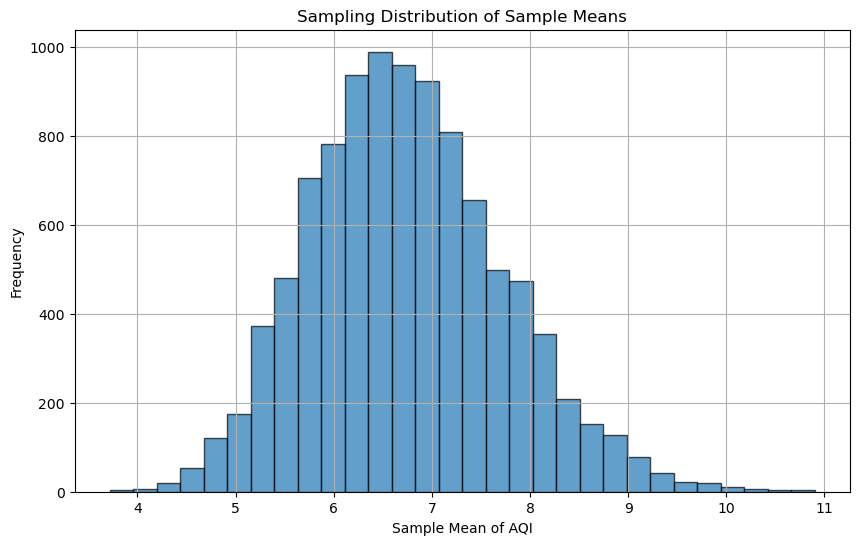

In [13]:
# Code Here
# Output the distribution of these estimates using a histogram
plt.figure(figsize=(10,6))
plt.hist(estimate_df['sample_mean'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Sampling Distribution of Sample Means')
plt.xlabel('Sample Mean of AQI')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Calculate the standard error

Calculate the standard error of the mean AQI using the initial sample of 50. The **standard error** of a statistic measures the sample-to-sample variability of the sample statistic. It provides a numerical measure of sampling variability and answers the question: How far is a statistic based on one particular sample from the actual value of the statistic?

In [14]:
# Code Here
# Calculate the standard error of the mean AQI using the initial sample of 50
sample_std = sampled_data['aqi'].std(ddof=1)
standard_error = sample_std / np.sqrt(50)

# Print out the standard error
print(f"Standard Error of the Mean AQI: {standard_error:.4f}")

Standard Error of the Mean AQI: 0.7413


## Step 4: Results and evaluation

###  Visualize the relationship between the sampling and normal distributions

Visualize the relationship between your sampling distribution of 10,000 estimates and the normal distribution.

1. Plot a histogram of the 10,000 sample means 
2. Add a vertical line indicating the mean of the first single sample of 50
3. Add another vertical line indicating the mean of the means of the 10,000 samples 
4. Add a third vertical line indicating the mean of the actual population

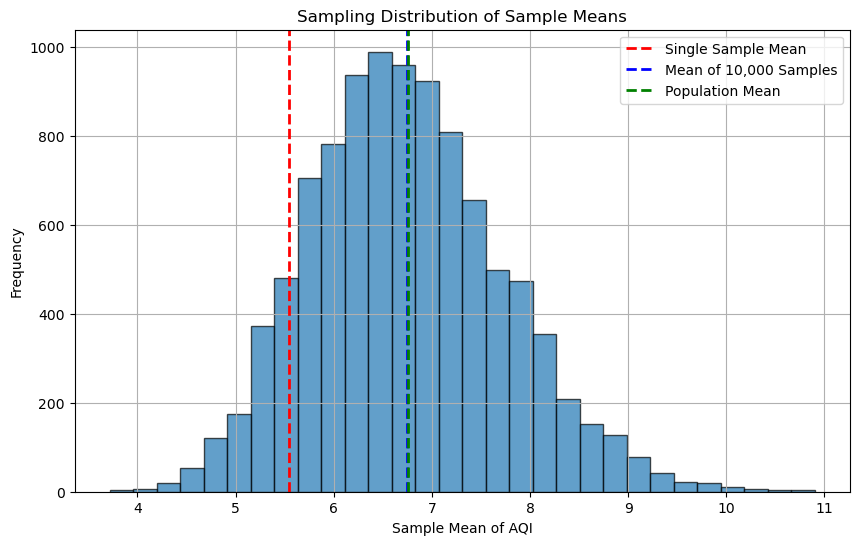

Standard Error of the Mean AQI: 0.7413


In [15]:
# Code Here
# Output the distribution of these estimates using a histogram
plt.figure(figsize=(10,6))
plt.hist(estimate_df['sample_mean'], bins=30, edgecolor='black', alpha=0.7)
plt.axvline(sampled_data['aqi'].mean(), color='red', linestyle='dashed', linewidth=2, label='Single Sample Mean')
plt.axvline(estimate_df['sample_mean'].mean(), color='blue', linestyle='dashed', linewidth=2, label='Mean of 10,000 Samples')
plt.axvline(df['aqi'].mean(), color='green', linestyle='dashed', linewidth=2, label='Population Mean')
plt.title('Sampling Distribution of Sample Means')
plt.xlabel('Sample Mean of AQI')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Calculate the standard error of the mean AQI using the initial sample of 50
sample_std = sampled_data['aqi'].std(ddof=1)
standard_error = sample_std / np.sqrt(50)

# Print out the standard error
print(f"Standard Error of the Mean AQI: {standard_error:.4f}")

**Question:** What insights did you gain from the preceding sampling distribution?

A: The sampling distribution follows a normal shape, confirming the Central Limit Theorem. While a single sample (red line) may differ from the true population mean (green line), the average of many samples (blue line) closely matches it. This shows that one sample can be misleading, but taking multiple samples improves accuracy. The smaller spread of sample means also indicates reduced variability, making statistical estimates more reliable. In short, more samples lead to better population estimates.

# Considerations

**What are some key takeaways that you learned from this project?**

A: This project highlights the importance of effective sampling techniques when analyzing large datasets, using air quality data on carbon monoxide levels as a case study. By employing methods such as simple random sampling, stratified sampling, systematic sampling, and cluster sampling, the analysis ensures that the sampled data remains representative of the overall dataset. The project utilizes Python libraries like pandas, numpy, matplotlib, statsmodels, and scipy to perform statistical analysis and visualize data distributions. Comparisons between sampled and full datasets, using summary statistics and hypothesis testing, demonstrate the reliability of different sampling strategies. These techniques are crucial in real-world scenarios where data professionals need to draw accurate insights from large-scale data while optimizing efficiency.

**What findings would you share with others?**

A: First, different sampling methods impact representativeness, with stratified sampling often providing a more balanced reflection of the full dataset compared to simple random sampling. Second, statistical comparisons, such as mean and standard deviation analysis, confirm the reliability of sampled data, ensuring that conclusions drawn from the subset align with the overall dataset. Third, visualizations like histograms and boxplots effectively reveal patterns and potential biases in sampling, helping analysts validate their approach. Finally, choosing the right sampling method is crucial for real-world applications, as it affects decision-making in environmental monitoring and policy-making based on air quality data. 

**What would you convey to external readers?**

A: This project demonstrates how effective sampling techniques improve efficiency and accuracy when analyzing large datasets. By comparing methods like simple random, stratified, systematic, and cluster sampling, the analysis highlights their impact on data representativeness. Statistical tests and visualizations confirm that well-chosen samples can reliably reflect full dataset trends, ensuring sound conclusions. These insights are crucial for data-driven decision-making, particularly in environmental analysis and policy formulation.